<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import</a></span><ul class="toc-item"><li><span><a href="#Librairies" data-toc-modified-id="Librairies-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Librairies</a></span></li><li><span><a href="#Fonctions" data-toc-modified-id="Fonctions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Fonctions</a></span></li><li><span><a href="#Données" data-toc-modified-id="Données-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Données</a></span></li></ul></li><li><span><a href="#Traitement-des-Images" data-toc-modified-id="Traitement-des-Images-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Traitement des Images</a></span></li><li><span><a href="#Modélisation" data-toc-modified-id="Modélisation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modélisation</a></span><ul class="toc-item"><li><span><a href="#Base" data-toc-modified-id="Base-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Base</a></span><ul class="toc-item"><li><span><a href="#Création-du-modèle" data-toc-modified-id="Création-du-modèle-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Création du modèle</a></span></li><li><span><a href="#Entrainement-du-modèle" data-toc-modified-id="Entrainement-du-modèle-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Entrainement du modèle</a></span></li><li><span><a href="#Evaluation-du-modèle" data-toc-modified-id="Evaluation-du-modèle-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Evaluation du modèle</a></span></li></ul></li><li><span><a href="#Data-Augmentation" data-toc-modified-id="Data-Augmentation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data Augmentation</a></span><ul class="toc-item"><li><span><a href="#Création-du-modèle" data-toc-modified-id="Création-du-modèle-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Création du modèle</a></span></li><li><span><a href="#Entrainement-du-modèle" data-toc-modified-id="Entrainement-du-modèle-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Entrainement du modèle</a></span></li><li><span><a href="#Evalutaion-du-modèle" data-toc-modified-id="Evalutaion-du-modèle-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Evalutaion du modèle</a></span></li></ul></li><li><span><a href="#RandAugment" data-toc-modified-id="RandAugment-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>RandAugment</a></span><ul class="toc-item"><li><span><a href="#Création-du-modèle" data-toc-modified-id="Création-du-modèle-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Création du modèle</a></span></li><li><span><a href="#Entrainement-du-modèle" data-toc-modified-id="Entrainement-du-modèle-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Entrainement du modèle</a></span></li><li><span><a href="#Evaluation-du-modèle" data-toc-modified-id="Evaluation-du-modèle-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Evaluation du modèle</a></span></li></ul></li></ul></li><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature importance</a></span><ul class="toc-item"><li><span><a href="#Création-de-fonctions" data-toc-modified-id="Création-de-fonctions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Création de fonctions</a></span></li><li><span><a href="#Création-du-modèle" data-toc-modified-id="Création-du-modèle-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Création du modèle</a></span></li><li><span><a href="#Chargement-des-donnés" data-toc-modified-id="Chargement-des-donnés-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Chargement des donnés</a></span></li><li><span><a href="#Graphiques" data-toc-modified-id="Graphiques-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Graphiques</a></span></li></ul></li></ul></div>

# Import
## Librairies

In [1]:
# Builtin
import os
import time
from os import listdir

# Data
import pandas as pd
import numpy as np

# Graphs
import matplotlib.pylab as pl
from matplotlib.colors import LinearSegmentedColormap

# Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve, confusion_matrix, classification_report

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from keras_cv.layers import RandAugment
from plot_keras_history import show_history, plot_history

# SHAP
import shap

#Image
from skimage.segmentation import slic

C:\Users\Thomas\AppData\Local\Temp\ipykernel_14220\1475907226.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd



Using TensorFlow backend


## Fonctions

In [8]:
def create_model_augmentation_fct(model_type="Base"):
    if model_type=="Data Augmentation":
    # Data augmentation
        data_augmentation = Sequential([
            RandomFlip("horizontal", input_shape=(224, 224, 3)),
            RandomRotation(0.1),
            RandomZoom(0.1)
        ])
    elif model_type=="RandAugment":
    # Apply data augmentation using RandAugment
        data_augmentation = RandAugment(value_range=(0, 255), augmentations_per_image=3, magnitude=0.1)
        
    # Récupération modèle pré-entraîné
    model_base = VGG16(include_top=False,
                       weights="imagenet",
                       input_shape=(224, 224, 3))
    for layer in model_base.layers:
        layer.trainable = False

    if model_type=="Base":
        # Définition du nouveau modèle
        model = Sequential([
            Rescaling(1. / 127.5, offset=-1.0),
            model_base,
            GlobalAveragePooling2D(),
            Dense(256, activation='relu'),
            Dropout(0.5),
            Dense(7, activation='softmax')
        ])
    else:
        # Définition du nouveau modèle
        model = Sequential([
            data_augmentation,
            Rescaling(1. / 127.5, offset=-1.0),
            model_base,
            GlobalAveragePooling2D(),
            Dense(256, activation='relu'),
            Dropout(0.5),
            Dense(7, activation='softmax')
        ])
    
    
    # Appeler build() en fournissant une forme d'entrée
    model.build((None, 224, 224, 3))
    
    # compilation du modèle
    model.compile(loss="categorical_crossentropy",
                  optimizer='adam',
                  metrics=["accuracy"])
    
    print(model.summary())
    
    return model


def image_prep_fct(data):
    prepared_images = []

    for image_path in data['image_path']:
        img = load_img(image_path, target_size=(224, 224))
        img_array = img_to_array(img)
        prepared_images.append(img_array)
        
    # Convert the list of prepared images to a NumPy array
    prepared_images_np = np.array(prepared_images)

    return prepared_images_np


def image_prep_feature_importance(data):
    prepared_images = []

    for image_path in data['image_path']:
        img = load_img(image_path, target_size=(224, 224))
        img_array = img_to_array(img)
        prepared_images.append(img_array)

    return prepared_images


def print_training_time(duration):
    if duration > 60:
        m = int(duration//60)
        s = int(duration - m*60)
        
    return print(f"Temps d'entrainement : {m}m {s}s")

## Données

In [9]:
path = "Data/Images/"
df = pd.read_csv("Data/final.csv")
df.head()

,text,main_category,clean_text,image_name
0,Elegance Polyester Multicolor Abstract Eyelet ...,Home Furnishing,elegance polyester multicolor abstract eyelet ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,Sathiyas Cotton Bath Towel Specifications of S...,Baby Care,cotton bath towel specification cotton bath to...,7b72c92c2f6c40268628ec5f14c6d590.jpg
2,Eurospa Cotton Terry Face Towel Set Key Featur...,Baby Care,cotton terry face towel set key feature cotton...,64d5d4a258243731dc7bbb1eef49ad74.jpg
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Home Furnishing,royal fashion cotton printed king sized double...,d4684dcdc759dd9cdf41504698d737d8.jpg
4,Jaipur Print Cotton Floral King sized Double B...,Home Furnishing,print cotton floral king sized double key feat...,6325b6870c54cd47be6ebfbffa620ec7.jpg


In [10]:
df["image_path"] = df["image_name"].apply(lambda x: path + x)

df.drop(columns=["text", "clean_text", "image_name"], axis=1, inplace=True)

df.head()

,main_category,image_path
0,Home Furnishing,Data/Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,Baby Care,Data/Images/7b72c92c2f6c40268628ec5f14c6d590.jpg
2,Baby Care,Data/Images/64d5d4a258243731dc7bbb1eef49ad74.jpg
3,Home Furnishing,Data/Images/d4684dcdc759dd9cdf41504698d737d8.jpg
4,Home Furnishing,Data/Images/6325b6870c54cd47be6ebfbffa620ec7.jpg


In [11]:
le = preprocessing.LabelEncoder()
le.fit(df["main_category"])

df["label"] = le.transform(df["main_category"])

In [7]:
1050/7

150.0

# Traitement des Images

In [12]:
images_full = image_prep_fct(df)

Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.


In [13]:
X = images_full
y = to_categorical(df["label"])

X_train_val, X_test, y_train_val, y_test = train_test_split(X,
                                                            y,
                                                            stratify=y,
                                                            test_size=0.3,
                                                            random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  stratify=y_train_val,
                                                  test_size=0.25,
                                                  random_state=42)

# Modélisation
## Base
### Création du modèle

In [80]:
model_base = create_model_augmentation_fct(model_type="Base")

# Création du callback
model_base_save_path = "./models/model_base_best_weights.keras"
checkpoint = ModelCheckpoint(model_base_save_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_14 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1  (None, 512)               0         
 4 (GlobalAveragePooling2D)                                      
                                                                 
 dense_28 (Dense)            (None, 256)               131328    
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_29 (Dense)            (None, 7)                 1799      
                                                     

### Entrainement du modèle

In [81]:
start = time.time()
history_base = model_base.fit(X_train,
                    y_train,
                    batch_size=64,
                    epochs=50,
                    callbacks=callbacks_list,
                    verbose=1,
                    validation_data=(X_val, y_val))
duration = time.time() - start

Epoch 1/50
9/9 [==============================] - ETA: 0s - loss: 1.9606 - accuracy: 0.2269
Epoch 1: val_loss improved from inf to 1.64407, saving model to ./models\model_base_best_weights.keras
9/9 [==============================] - 58s 6s/step - loss: 1.9606 - accuracy: 0.2269 - val_loss: 1.6441 - val_accuracy: 0.4891
Epoch 2/50
9/9 [==============================] - ETA: 0s - loss: 1.5596 - accuracy: 0.4374
Epoch 2: val_loss improved from 1.64407 to 1.35430, saving model to ./models\model_base_best_weights.keras
9/9 [==============================] - 48s 5s/step - loss: 1.5596 - accuracy: 0.4374 - val_loss: 1.3543 - val_accuracy: 0.6793
Epoch 3/50
9/9 [==============================] - ETA: 0s - loss: 1.2017 - accuracy: 0.6279
Epoch 3: val_loss improved from 1.35430 to 1.17497, saving model to ./models\model_base_best_weights.keras
9/9 [==============================] - 47s 5s/step - loss: 1.2017 - accuracy: 0.6279 - val_loss: 1.1750 - val_accuracy: 0.7065
Epoch 4/50
9/9 [==========

Epoch 27: early stopping


### Evaluation du modèle

In [82]:
# Score du dernier epoch

loss, accuracy = model_base.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print()
loss, accuracy = model_base.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy:  {:.4f}".format(accuracy))
print()
loss, accuracy = model_base.evaluate(X_test, y_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))
print()
print_training_time(duration)

Training Accuracy: 0.9310

Validation Accuracy:  0.7935

Test Accuracy       :  0.7905

Temps d'entrainement : 21m 29s


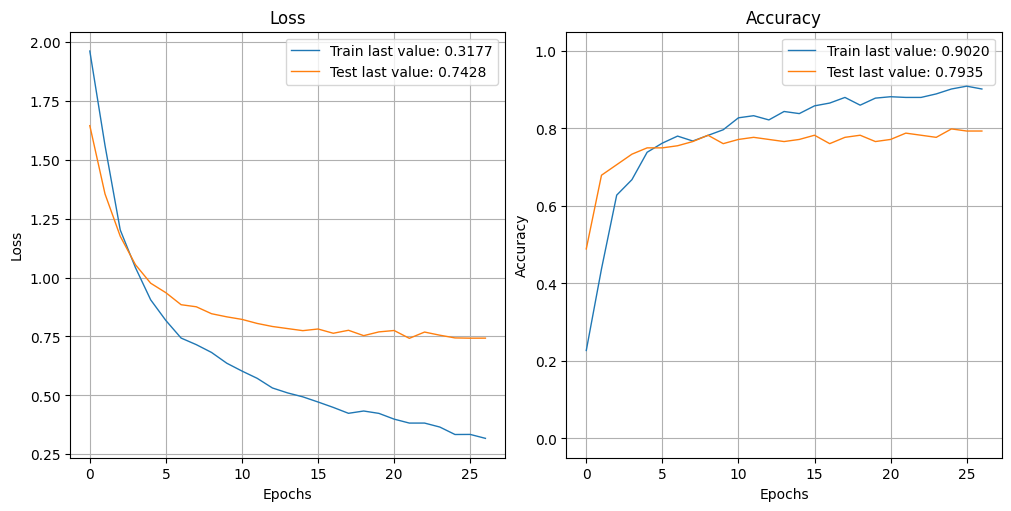

In [83]:
show_history(history_base)
plot_history(history_base, path="Graphs/base.png")
plt.close()

## Data Augmentation
### Création du modèle

In [84]:
model_augment = create_model_augmentation_fct(model_type="Data Augmentation")

# Création du callback
model_augment_save_path = "./models/model_augment_best_weights.keras"
checkpoint = ModelCheckpoint(model_augment_save_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_18 (Sequential)  (None, 224, 224, 3)       0         
                                                                 
 rescaling_15 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1  (None, 512)               0         
 5 (GlobalAveragePooling2D)                                      
                                                                 
 dense_30 (Dense)            (None, 256)               131328    
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                     

### Entrainement du modèle

In [85]:
start = time.time()
history_augment = model_augment.fit(X_train,
                    y_train,
                    batch_size=64,
                    epochs=50,
                    callbacks=callbacks_list,
                    verbose=1,
                    validation_data=(X_val, y_val))
duration = time.time() - start

Epoch 1/50
9/9 [==============================] - ETA: 0s - loss: 1.9987 - accuracy: 0.1942
Epoch 1: val_loss improved from inf to 1.60224, saving model to ./models\model_augment_best_weights.keras
9/9 [==============================] - 51s 6s/step - loss: 1.9987 - accuracy: 0.1942 - val_loss: 1.6022 - val_accuracy: 0.5870
Epoch 2/50
9/9 [==============================] - ETA: 0s - loss: 1.6301 - accuracy: 0.3993
Epoch 2: val_loss improved from 1.60224 to 1.36011, saving model to ./models\model_augment_best_weights.keras
9/9 [==============================] - 48s 5s/step - loss: 1.6301 - accuracy: 0.3993 - val_loss: 1.3601 - val_accuracy: 0.6630
Epoch 3/50
9/9 [==============================] - ETA: 0s - loss: 1.3593 - accuracy: 0.5481
Epoch 3: val_loss improved from 1.36011 to 1.18092, saving model to ./models\model_augment_best_weights.keras
9/9 [==============================] - 47s 5s/step - loss: 1.3593 - accuracy: 0.5481 - val_loss: 1.1809 - val_accuracy: 0.7283
Epoch 4/50
9/9 [=

Epoch 28/50
9/9 [==============================] - ETA: 0s - loss: 0.4985 - accuracy: 0.8294
Epoch 28: val_loss did not improve from 0.78102
9/9 [==============================] - 44s 5s/step - loss: 0.4985 - accuracy: 0.8294 - val_loss: 0.7955 - val_accuracy: 0.7554
Epoch 29/50
9/9 [==============================] - ETA: 0s - loss: 0.5050 - accuracy: 0.8439
Epoch 29: val_loss did not improve from 0.78102
9/9 [==============================] - 44s 5s/step - loss: 0.5050 - accuracy: 0.8439 - val_loss: 0.8144 - val_accuracy: 0.7337
Epoch 30/50
9/9 [==============================] - ETA: 0s - loss: 0.4789 - accuracy: 0.8603
Epoch 30: val_loss did not improve from 0.78102
9/9 [==============================] - 44s 5s/step - loss: 0.4789 - accuracy: 0.8603 - val_loss: 0.7973 - val_accuracy: 0.7446
Epoch 30: early stopping


### Evalutaion du modèle

In [86]:
# Score du dernier epoch

loss, accuracy = model_augment.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print()
loss, accuracy = model_augment.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy:  {:.4f}".format(accuracy))
print()
loss, accuracy = model_augment.evaluate(X_test, y_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))
print()
print_training_time(duration)

Training Accuracy: 0.8893

Validation Accuracy:  0.7446

Test Accuracy       :  0.7619

Temps d'entrainement : 23m 11s


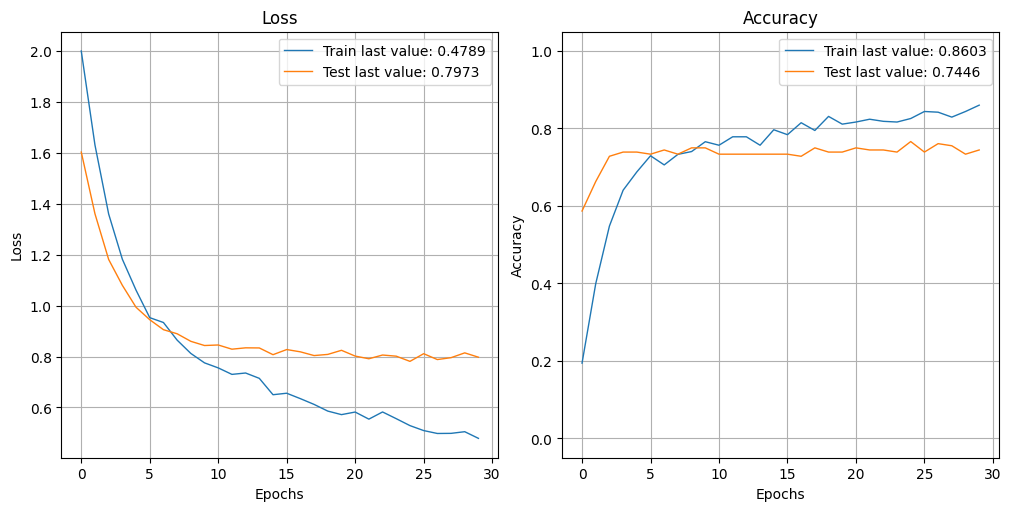

In [87]:
show_history(history_augment)
plot_history(history_augment, path="Graphs/augmentation.png")
plt.close()

## RandAugment
### Création du modèle

In [18]:
model_rand = create_model_augmentation_fct(model_type="RandAugment")

# Création du callback
model_rand_save_path = "./models/model_rand_best_weights.keras"
checkpoint = ModelCheckpoint(model_rand_save_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rand_augment (RandAugment)  (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                     

### Entrainement du modèle

In [89]:
start = time.time()
history_rand = model_rand.fit(X_train,
                    y_train,
                    batch_size=64,
                    epochs=50,
                    callbacks=callbacks_list,
                    verbose=1,
                    validation_data=(X_val, y_val))
duration = time.time() - start

Epoch 1/50
9/9 [==============================] - ETA: 0s - loss: 1.9363 - accuracy: 0.2359
Epoch 1: val_loss improved from inf to 1.67836, saving model to ./models\model_rand_best_weights.keras
9/9 [==============================] - 60s 6s/step - loss: 1.9363 - accuracy: 0.2359 - val_loss: 1.6784 - val_accuracy: 0.4185
Epoch 2/50
9/9 [==============================] - ETA: 0s - loss: 1.5973 - accuracy: 0.4301
Epoch 2: val_loss improved from 1.67836 to 1.45701, saving model to ./models\model_rand_best_weights.keras
9/9 [==============================] - 45s 5s/step - loss: 1.5973 - accuracy: 0.4301 - val_loss: 1.4570 - val_accuracy: 0.6141
Epoch 3/50
9/9 [==============================] - ETA: 0s - loss: 1.3713 - accuracy: 0.5517
Epoch 3: val_loss improved from 1.45701 to 1.28286, saving model to ./models\model_rand_best_weights.keras
9/9 [==============================] - 45s 5s/step - loss: 1.3713 - accuracy: 0.5517 - val_loss: 1.2829 - val_accuracy: 0.6957
Epoch 4/50
9/9 [==========

### Evaluation du modèle

In [90]:
# Score du dernier epoch

loss, accuracy = model_rand.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print()
loss, accuracy = model_rand.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy:  {:.4f}".format(accuracy))
print()
loss, accuracy = model_rand.evaluate(X_test, y_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))
print()
print_training_time(duration)

Training Accuracy: 0.8693

Validation Accuracy:  0.7391

Test Accuracy       :  0.7683

Temps d'entrainement : 17m 30s


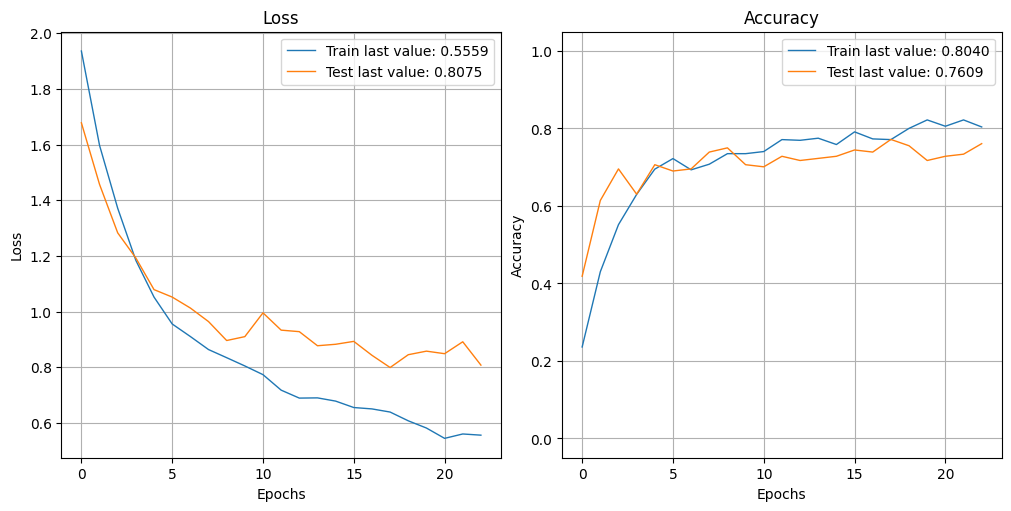

In [91]:
show_history(history_rand)
plot_history(history_rand, path="Graphs/rand.png")
plt.close()

# Feature importance
## Création de fonctions

In [16]:
def mask_image(zs, segmentation, image, background=None):
    if background is None:
        background = image.mean((0,1))
    out = np.zeros((zs.shape[0], image.shape[0], image.shape[1], image.shape[2]))
    for i in range(zs.shape[0]):
        out[i,:,:,:] = image
        for j in range(zs.shape[1]):
            if zs[i,j] == 0:
                out[i][segmentation == j,:] = background
    return out


def f(z):
    return model_features.predict(mask_image(z, segments_slic, img_orig, 255))


def fill_segmentation(values, segmentation):
    out = np.zeros(segmentation.shape)
    for i in range(len(values)):
        out[segmentation == i] = values[i]
    return out

def graph_feature(img, segments, shap_values, top_preds, feature_names):
    
    # plot our explanations
    fig, axes = pl.subplots(nrows=1, ncols=4, figsize=(12,4))
    inds = top_preds[0]
    axes[0].imshow(img)
    axes[0].axis('off')
    max_val = np.max([np.max(np.abs(shap_values[i][:,:-1])) for i in range(len(shap_values))])
    for i in range(3):
        m = fill_segmentation(shap_values[inds[i]][0], segments)
        axes[i+1].set_title(feature_names[inds[i]])
        axes[i+1].imshow(img.convert('LA'), alpha=0.15)
        im = axes[i+1].imshow(m, cmap=cm, vmin=-max_val, vmax=max_val)
        axes[i+1].axis('off')
    cb = fig.colorbar(im, ax=axes.ravel().tolist(), label="SHAP value", orientation="horizontal", aspect=60)
    cb.outline.set_visible(False)
    pl.show()

## Création du modèle

In [19]:
model_features = create_model_augmentation_fct("RandAugment") 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rand_augment_1 (RandAugmen  (None, 224, 224, 3)       0         
 t)                                                              
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)              

In [20]:
model_features_save_path = "./models/model_rand_best_weights.keras"
model_features.load_weights(model_features_save_path)

## Chargement des donnés

In [17]:
df_features = df[["label", "main_category"]].sort_values(by="label")

feature_names = df_features["main_category"].unique()

In [64]:
df_train, df_test, y_train, y_test= train_test_split(df,
                                      y,
                                      stratify=y,
                                      test_size=0.3,
                                      random_state=42)

In [21]:
y_pred = model_features.predict(X_test)

10/10 [==============================] - 22s 2s/step


In [56]:
predicted_classes = np.argmax(y_pred, axis=1)
predicted_classes

array([2, 1, 5, 0, 2, 6, 0, 0, 3, 3, 1, 1, 3, 0, 5, 4, 6, 0, 3, 0, 1, 5,
       1, 1, 2, 1, 5, 6, 3, 0, 5, 0, 1, 3, 2, 3, 2, 4, 1, 1, 0, 2, 2, 3,
       0, 0, 0, 1, 2, 3, 4, 2, 2, 6, 1, 3, 0, 3, 5, 6, 1, 1, 4, 0, 1, 4,
       1, 4, 4, 6, 5, 5, 0, 6, 1, 4, 3, 1, 2, 2, 4, 2, 5, 6, 0, 2, 0, 0,
       5, 1, 3, 2, 4, 5, 3, 1, 5, 5, 2, 3, 1, 6, 2, 6, 5, 5, 0, 6, 4, 2,
       4, 5, 0, 3, 6, 0, 0, 6, 5, 3, 3, 3, 0, 5, 6, 2, 5, 3, 4, 4, 0, 4,
       4, 2, 0, 3, 0, 2, 5, 2, 3, 4, 2, 6, 1, 3, 0, 5, 2, 1, 1, 3, 0, 0,
       1, 2, 6, 1, 2, 0, 2, 1, 2, 3, 0, 4, 2, 3, 5, 6, 0, 5, 5, 3, 4, 4,
       2, 2, 5, 5, 1, 2, 4, 2, 3, 6, 1, 4, 5, 2, 0, 0, 2, 4, 3, 6, 3, 6,
       5, 3, 6, 1, 2, 0, 2, 3, 6, 3, 2, 6, 5, 4, 4, 6, 4, 3, 1, 0, 1, 5,
       5, 0, 3, 5, 4, 0, 6, 3, 0, 3, 6, 0, 2, 4, 6, 6, 0, 2, 1, 6, 6, 6,
       1, 0, 5, 3, 1, 2, 4, 4, 3, 2, 6, 3, 5, 2, 6, 1, 4, 1, 3, 4, 3, 5,
       3, 5, 2, 6, 6, 2, 2, 2, 4, 6, 3, 2, 4, 5, 6, 0, 2, 5, 2, 4, 2, 3,
       2, 5, 3, 4, 6, 6, 4, 5, 6, 6, 2, 0, 4, 6, 6,

In [58]:
true_classes = np.argmax(y_test, axis=1)
true_classes

array([2, 1, 5, 0, 6, 6, 3, 0, 3, 3, 2, 1, 3, 0, 5, 4, 1, 0, 0, 0, 1, 3,
       1, 1, 0, 1, 0, 6, 0, 0, 1, 4, 1, 2, 2, 3, 2, 4, 1, 1, 0, 2, 2, 5,
       0, 0, 5, 1, 2, 1, 4, 4, 5, 6, 1, 3, 0, 3, 5, 6, 1, 1, 0, 3, 1, 4,
       1, 4, 3, 6, 5, 5, 4, 6, 1, 4, 3, 1, 2, 5, 4, 5, 5, 6, 4, 1, 3, 0,
       5, 2, 3, 2, 4, 0, 3, 1, 5, 5, 2, 3, 2, 6, 2, 6, 5, 5, 0, 5, 4, 2,
       4, 3, 4, 3, 6, 0, 0, 6, 5, 3, 5, 3, 0, 5, 6, 2, 5, 3, 0, 4, 0, 4,
       4, 5, 0, 3, 4, 2, 5, 2, 0, 4, 2, 6, 1, 3, 0, 4, 6, 1, 1, 2, 0, 0,
       1, 2, 6, 1, 2, 0, 2, 1, 4, 3, 4, 4, 2, 3, 5, 6, 4, 5, 3, 3, 4, 4,
       2, 2, 5, 5, 1, 3, 1, 1, 4, 6, 1, 4, 5, 2, 0, 5, 2, 4, 2, 6, 3, 6,
       5, 3, 6, 1, 2, 0, 3, 2, 6, 3, 1, 6, 5, 4, 3, 5, 4, 0, 1, 0, 1, 5,
       5, 0, 3, 5, 0, 0, 6, 5, 0, 3, 6, 0, 2, 4, 6, 6, 4, 2, 3, 6, 6, 6,
       1, 0, 0, 4, 1, 2, 4, 0, 3, 6, 6, 3, 3, 5, 5, 1, 4, 1, 4, 4, 3, 5,
       3, 6, 2, 6, 6, 3, 2, 2, 4, 6, 0, 2, 4, 5, 6, 3, 2, 5, 2, 4, 2, 3,
       1, 5, 3, 4, 1, 6, 0, 5, 6, 6, 2, 0, 4, 6, 6,

In [59]:
incorrect_indices = np.where(predicted_classes != true_classes)[0]

In [67]:
incorrect_indices

array([  4,   6,  10,  16,  18,  21,  24,  26,  28,  30,  31,  33,  43,
        46,  49,  51,  52,  62,  63,  68,  72,  79,  81,  84,  85,  86,
        89,  93, 100, 107, 111, 112, 120, 128, 133, 136, 140, 147, 148,
       151, 162, 164, 170, 172, 181, 182, 183, 184, 191, 194, 204, 205,
       208, 212, 213, 215, 224, 227, 236, 238, 244, 245, 249, 251, 254,
       255, 256, 260, 265, 269, 274, 279, 286, 290, 292, 302, 307, 311],
      dtype=int64)

In [65]:
sample_df = df_test.iloc[incorrect_indices].sample(20, random_state=42)

In [66]:
sample_df

,main_category,image_path,label
63,Baby Care,Data/Images/f4e7f269319ba9cf5507a9e2febacbf5.jpg,0
759,Watches,Data/Images/e80e5151787eb21b0cca0d7dc3b0c338.jpg,6
218,Kitchen & Dining,Data/Images/ce02ab514e4c623dcf7acd7182a7762d.jpg,5
956,Kitchen & Dining,Data/Images/b91b13aceec0a140944a2c8915e45e59.jpg,5
953,Home Furnishing,Data/Images/13596c5cc53a74268613e5c0b7d46b60.jpg,4
458,Computers,Data/Images/650e27dff8f645649353743f64e03f77.jpg,2
222,Home Decor & Festive Needs,Data/Images/922a04084481d4b3275a3f7bb54e90f3.jpg,3
1042,Baby Care,Data/Images/057836ecde71565f8ebdd576e41fdc96.jpg,0
1032,Computers,Data/Images/b5834f1e97c74d2833dbcb09a3f27926.jpg,2
677,Kitchen & Dining,Data/Images/5518124b75d6c6dfee4c2e4c0cfa716a.jpg,5


## Graphiques

In [61]:
# make a color map
colors = []
for l in np.linspace(1,0,100):
    colors.append((245/255,39/255,87/255,l))
for l in np.linspace(0,1,100):
    colors.append((24/255,196/255,93/255,l))
cm = LinearSegmentedColormap.from_list("shap", colors)

1/1 [==============================] - 0s 101ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 101ms/step


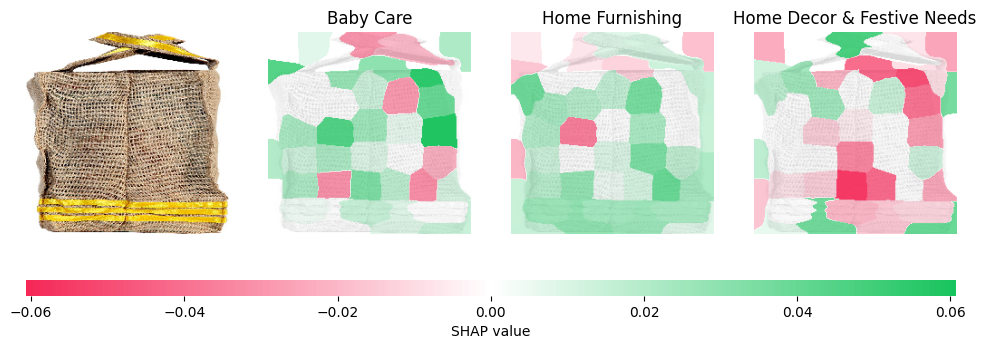

1/1 [==============================] - 0s 118ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 137ms/step


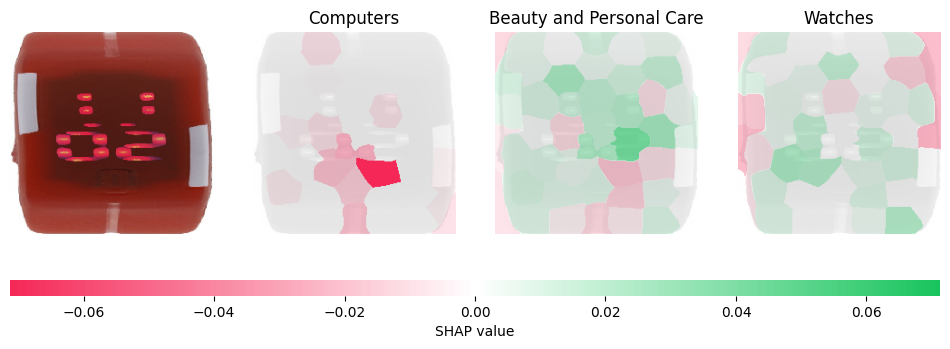

1/1 [==============================] - 0s 123ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 100ms/step


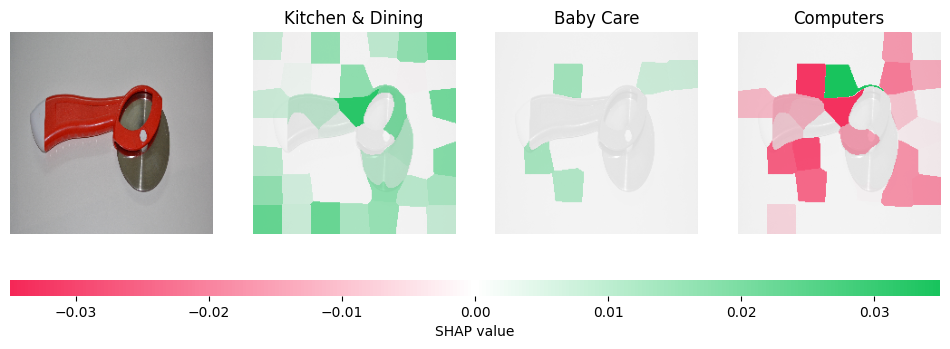

1/1 [==============================] - 0s 109ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 105ms/step


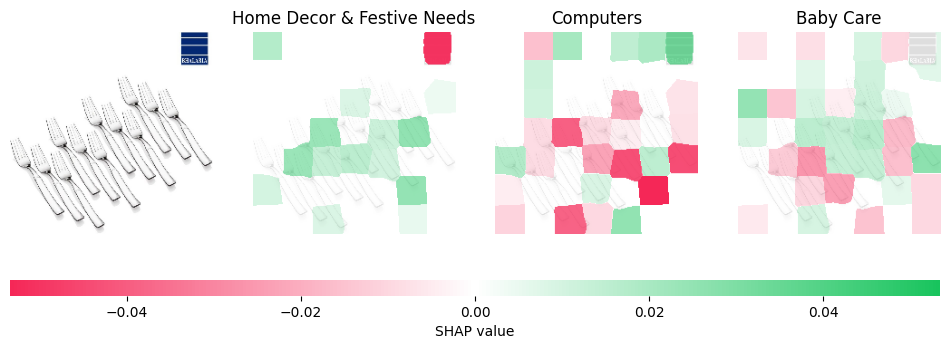

1/1 [==============================] - 0s 119ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 120ms/step


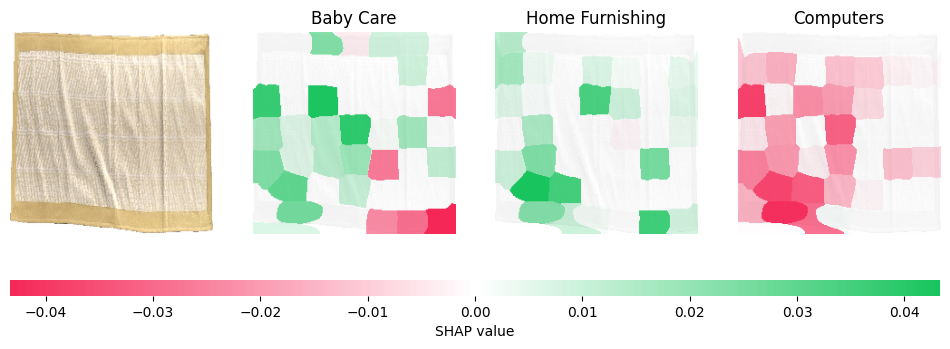

1/1 [==============================] - 0s 123ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 118ms/step


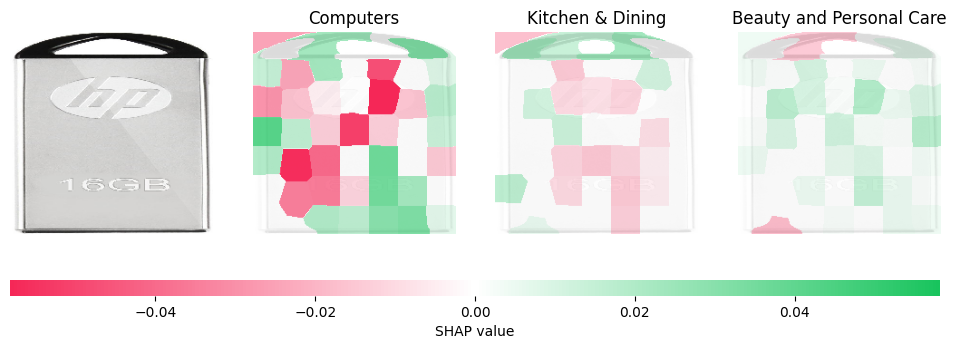

1/1 [==============================] - 0s 125ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 117ms/step


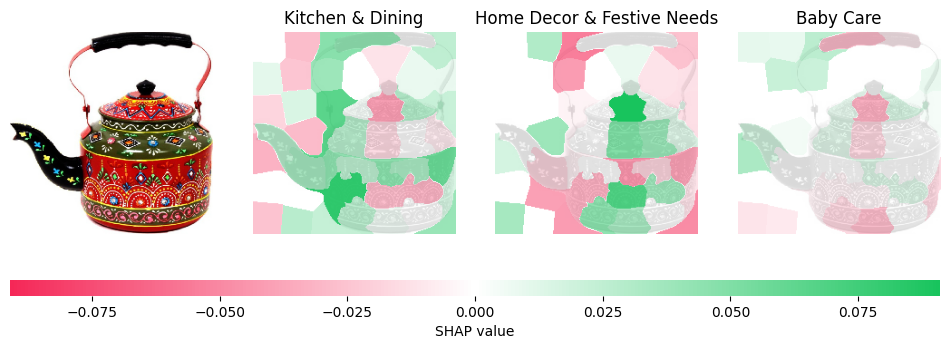

1/1 [==============================] - 0s 117ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 105ms/step


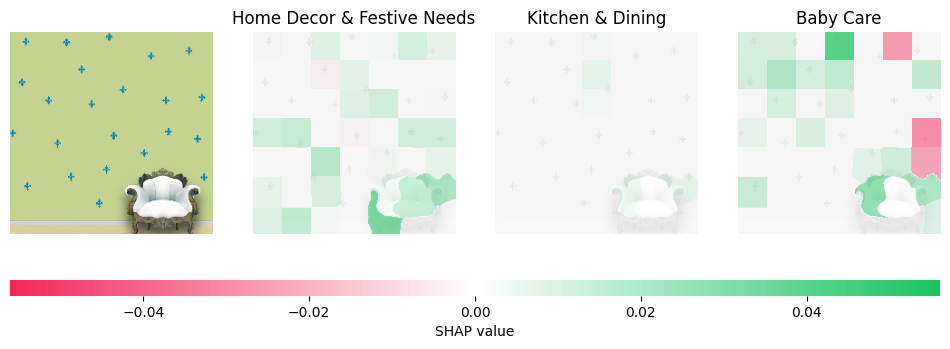

1/1 [==============================] - 0s 110ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 106ms/step


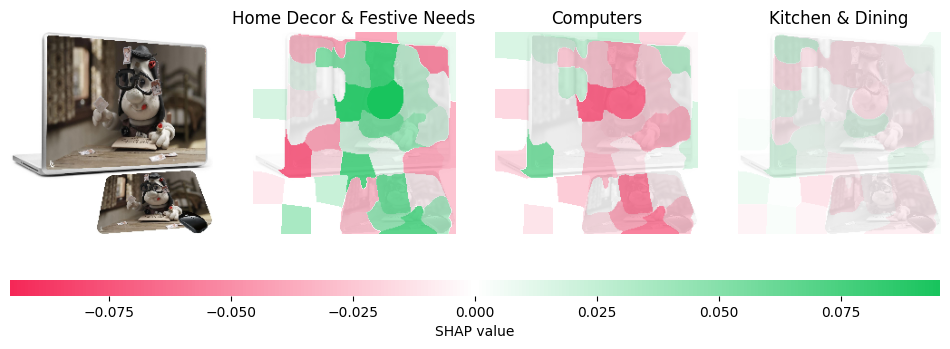

Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.


1/1 [==============================] - 0s 109ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 103ms/step


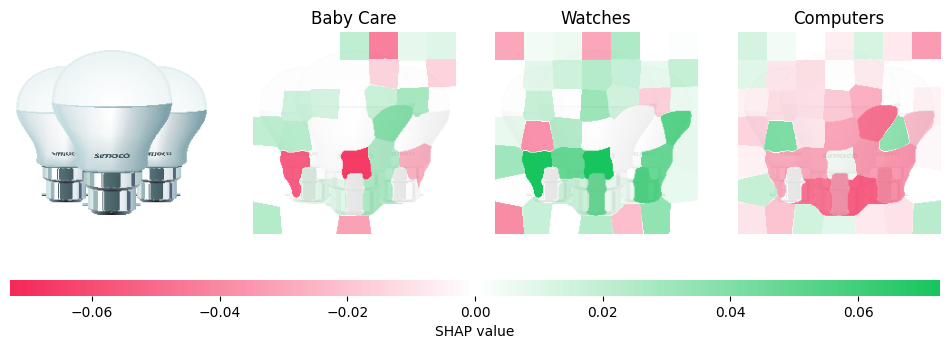

1/1 [==============================] - 0s 107ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 113ms/step


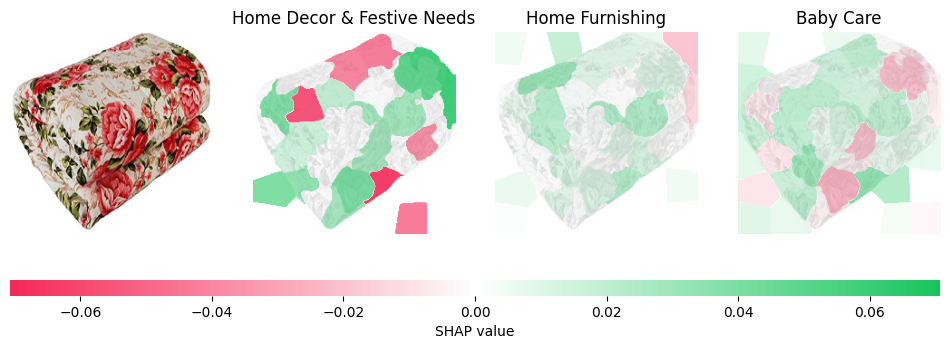

1/1 [==============================] - 0s 108ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 107ms/step


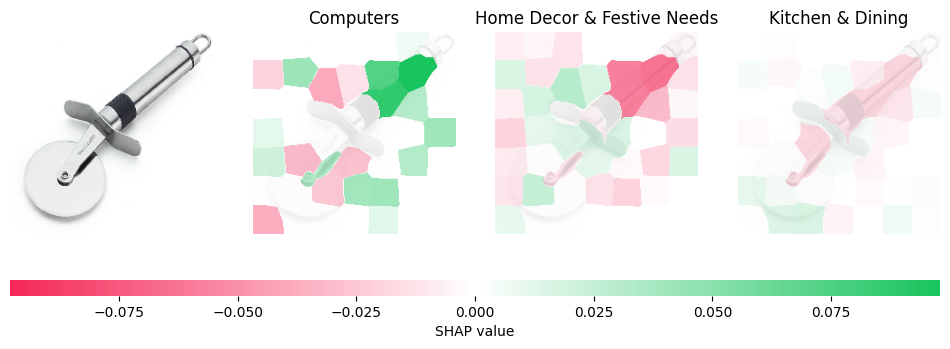

1/1 [==============================] - 0s 101ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 123ms/step


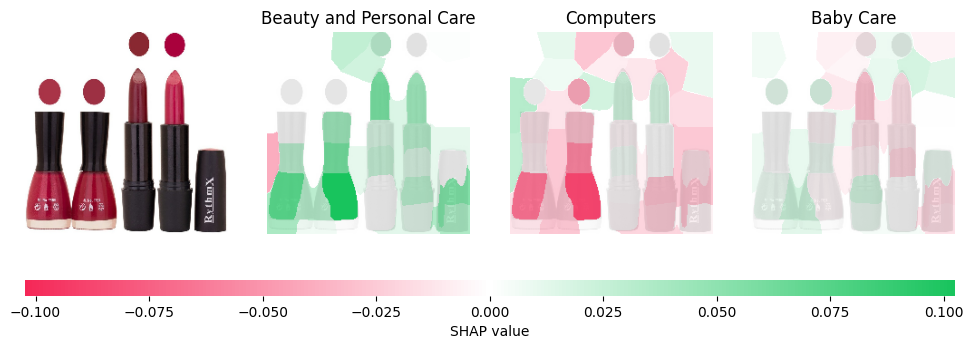

1/1 [==============================] - 0s 109ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 110ms/step


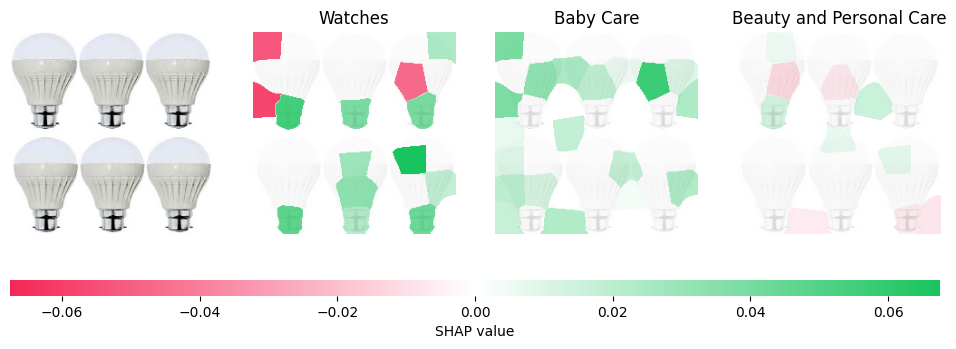

1/1 [==============================] - 0s 109ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 108ms/step


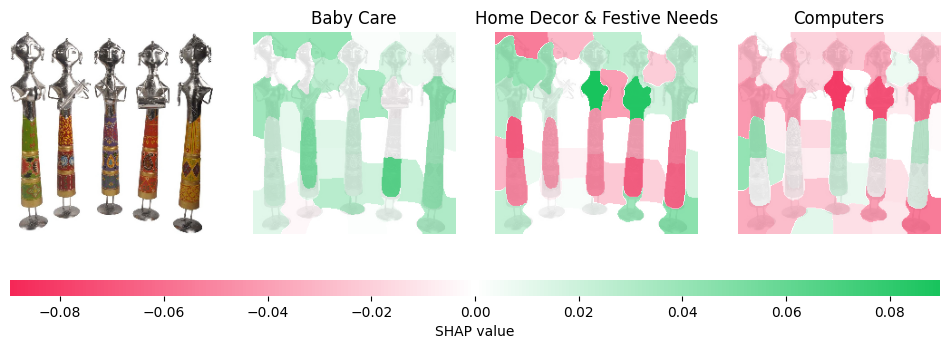

1/1 [==============================] - 0s 108ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 106ms/step


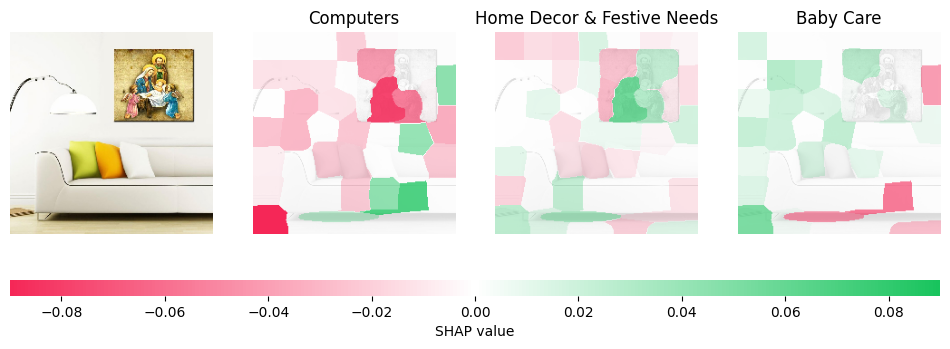

1/1 [==============================] - 0s 112ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 104ms/step


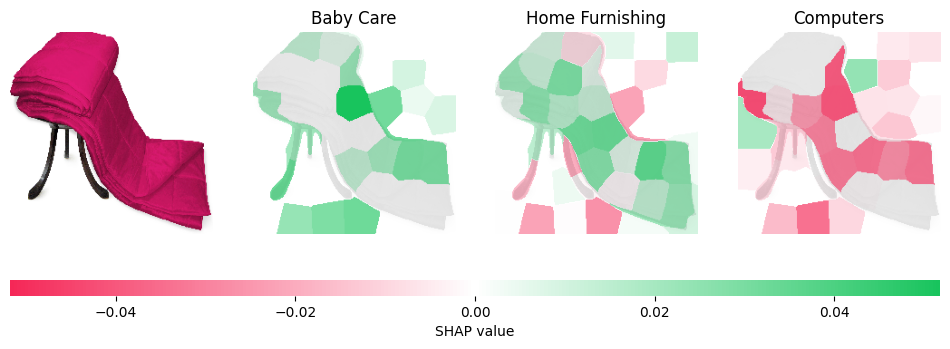

1/1 [==============================] - 0s 103ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 103ms/step


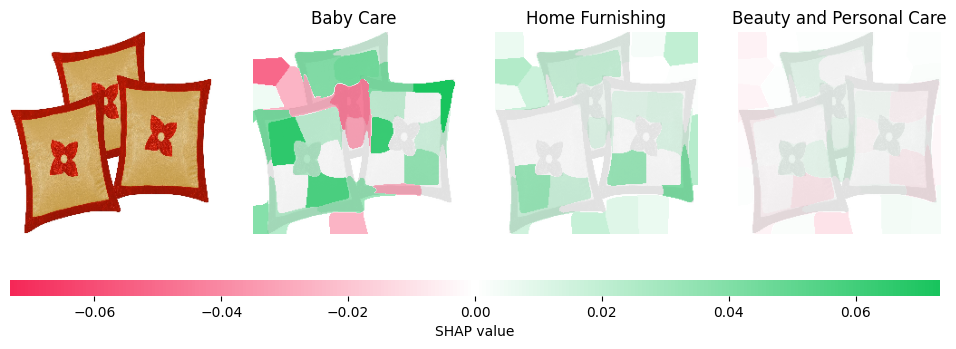

1/1 [==============================] - 0s 104ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 135ms/step


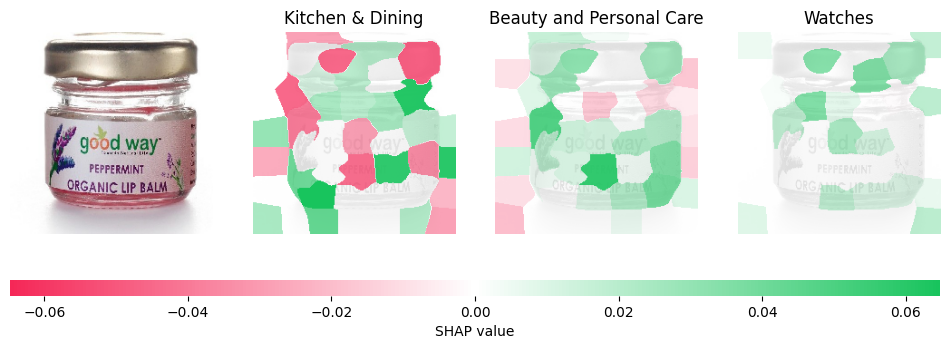

1/1 [==============================] - 0s 127ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 108ms/step


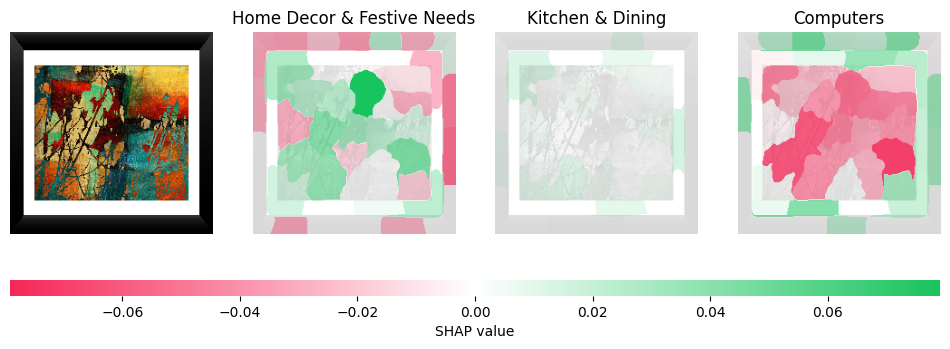

In [68]:
for path in sample_df["image_path"]:
    img = load_img(path, target_size=(224,224))
    img_orig = img_to_array(img)
    
    segments_slic = slic(img_orig, n_segments=50, compactness=30, sigma=3)
    
    explainer_loc = shap.KernelExplainer(f, np.zeros((1,50)))
    shap_values_loc = explainer_loc.shap_values(np.ones((1,50)), nsamples=500)
    
    # get the top predictions from the model
    preds_loc = model_features.predict(np.expand_dims(img_orig.copy(), axis=0))
    top_preds_loc = np.argsort(-preds_loc)
    
    graph_feature(img, segments_slic, shap_values_loc, top_preds_loc, feature_names)